In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline  

In [29]:
arq = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
housing = pd.read_csv(arq)

In [30]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [31]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


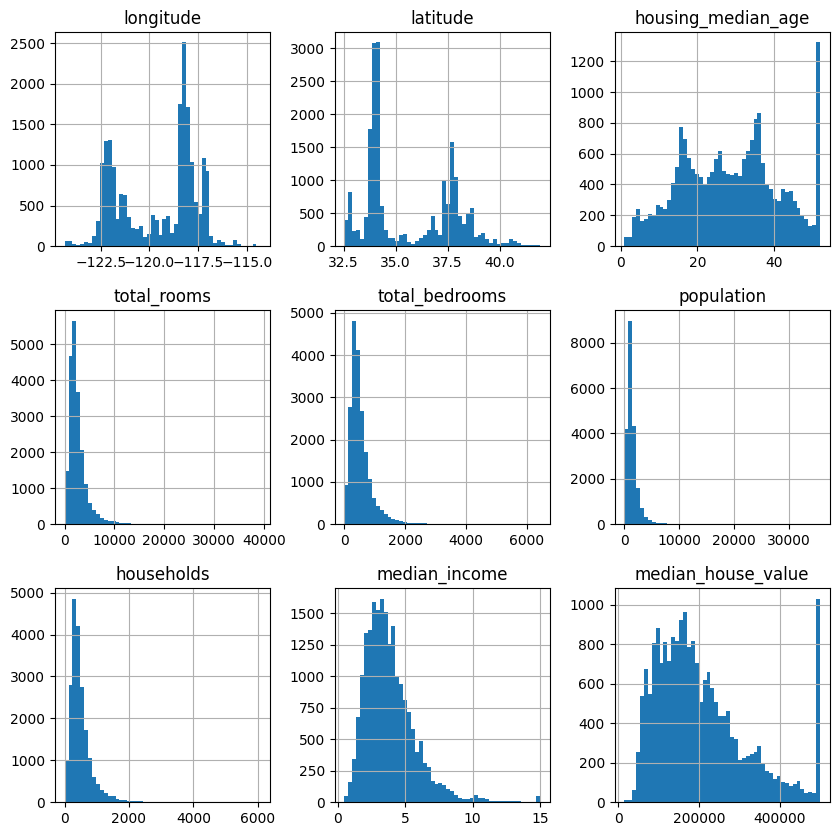

In [32]:
housing.hist(bins=50, figsize=(10,10));

In [33]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.5, inplace=True)

<AxesSubplot: >

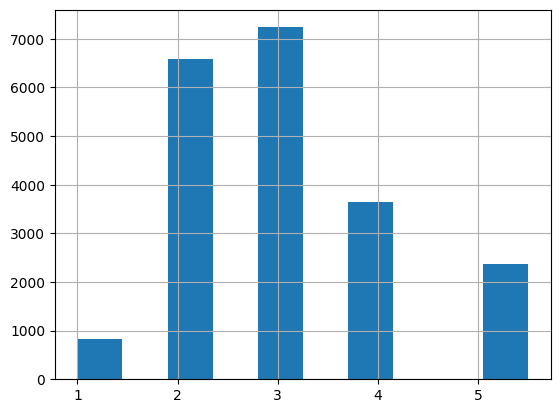

In [34]:
housing['income_cat'].hist(bins=10)

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.20 ,random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [36]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.5    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

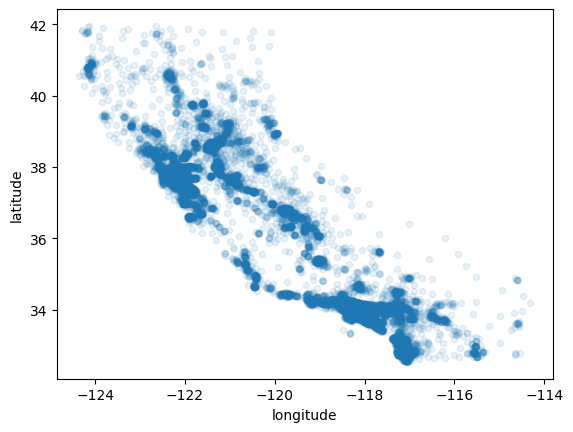

In [37]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

In [38]:
strat_test_set.shape[0] / strat_train_set.shape[0]

0.25

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.20 ,random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    print(f'TRAIN {test_index}')
    print(f'TRAIN {train_index}')

TRAIN [ 5241 17352  3505 ... 17223 10786  3965]
TRAIN [12655 15502  2908 ... 19263 19140 19773]


In [40]:
housing.loc[[0,1,2,3,4]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [41]:
corr_matrix = housing.corr()

corr_matrix['total_rooms'].sort_values(ascending=False)

C:\Users\renat\AppData\Local\Temp\ipykernel_9140\1228769752.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


total_rooms           1.000000
total_bedrooms        0.930380
households            0.918484
population            0.857126
income_cat            0.216143
median_income         0.198050
median_house_value    0.134153
longitude             0.044568
latitude             -0.036100
housing_median_age   -0.361262
Name: total_rooms, dtype: float64

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

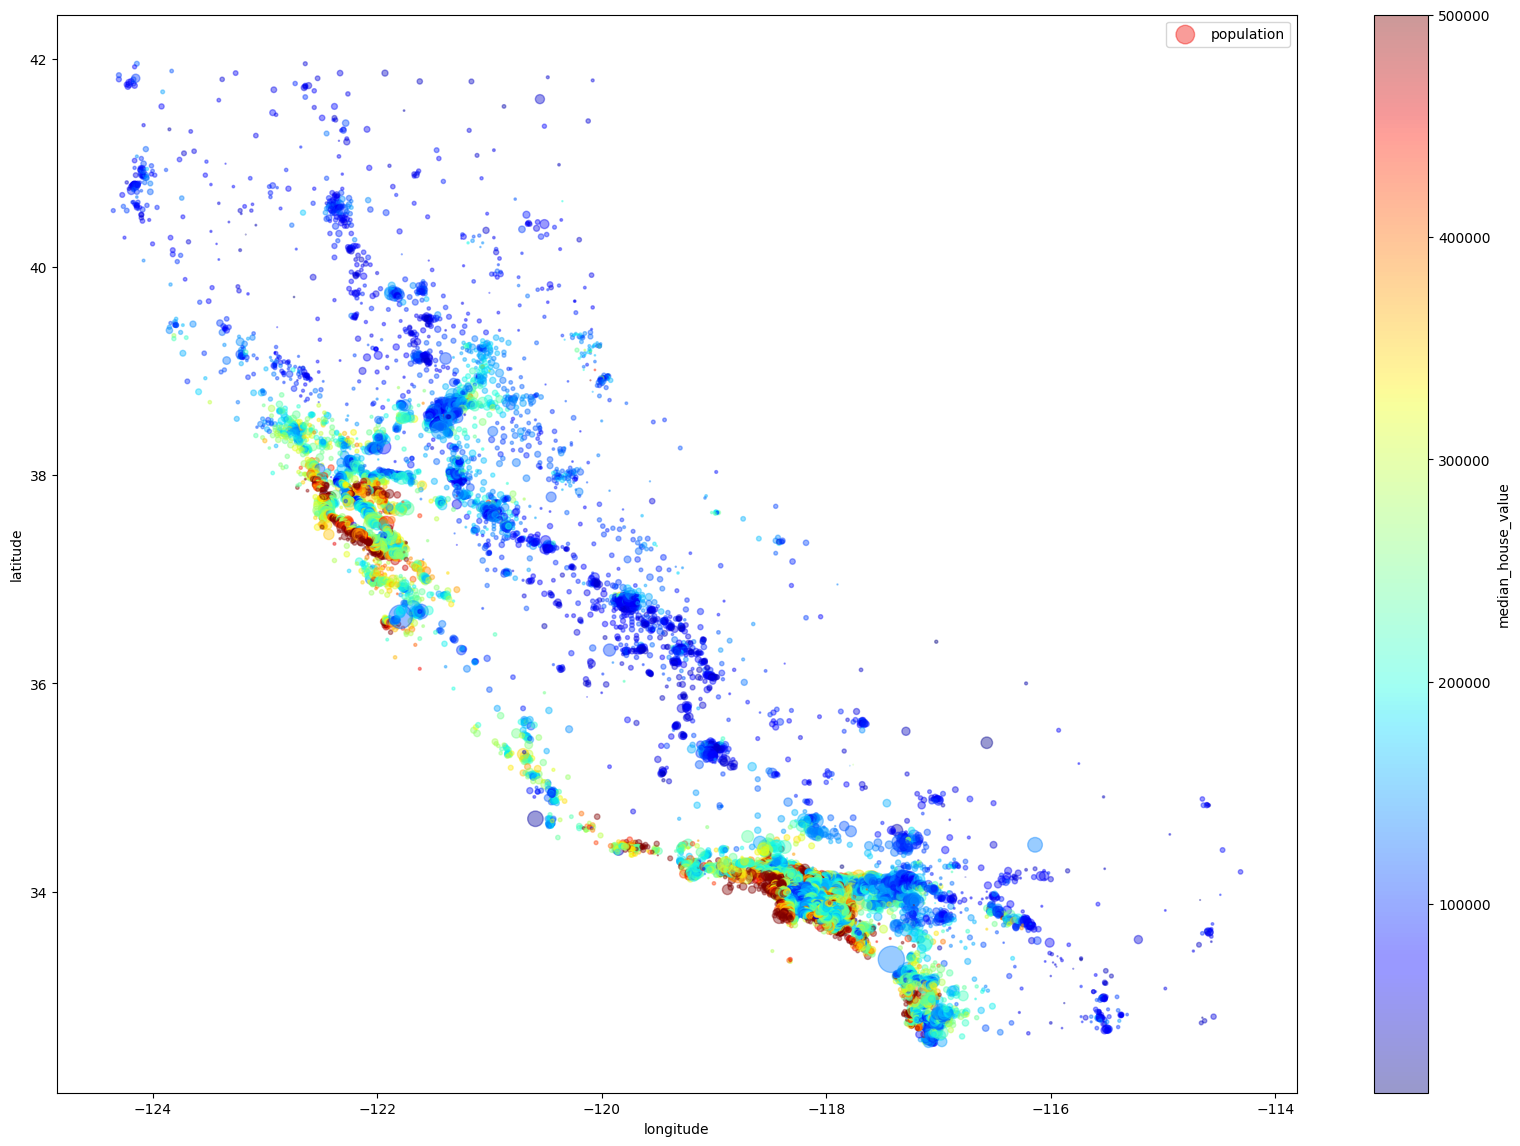

In [47]:

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population'] * .01, label='population',
             figsize=(20,14), c='median_house_value', cmap="jet", colorbar=True)

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

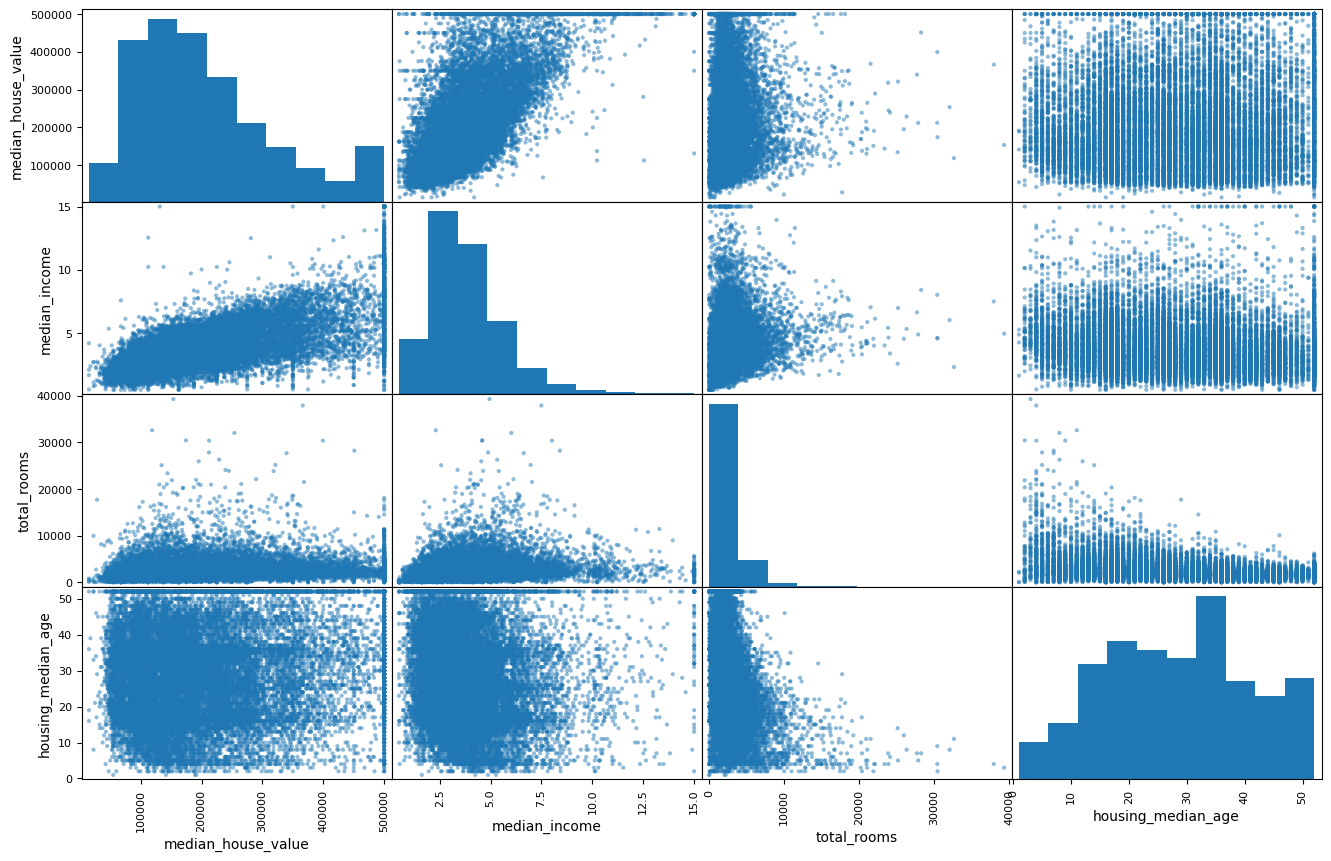

In [48]:
from pandas.plotting import scatter_matrix
atrr = ['median_house_value','median_income','total_rooms','housing_median_age']

scatter_matrix(housing[atrr], figsize=(16,10))

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

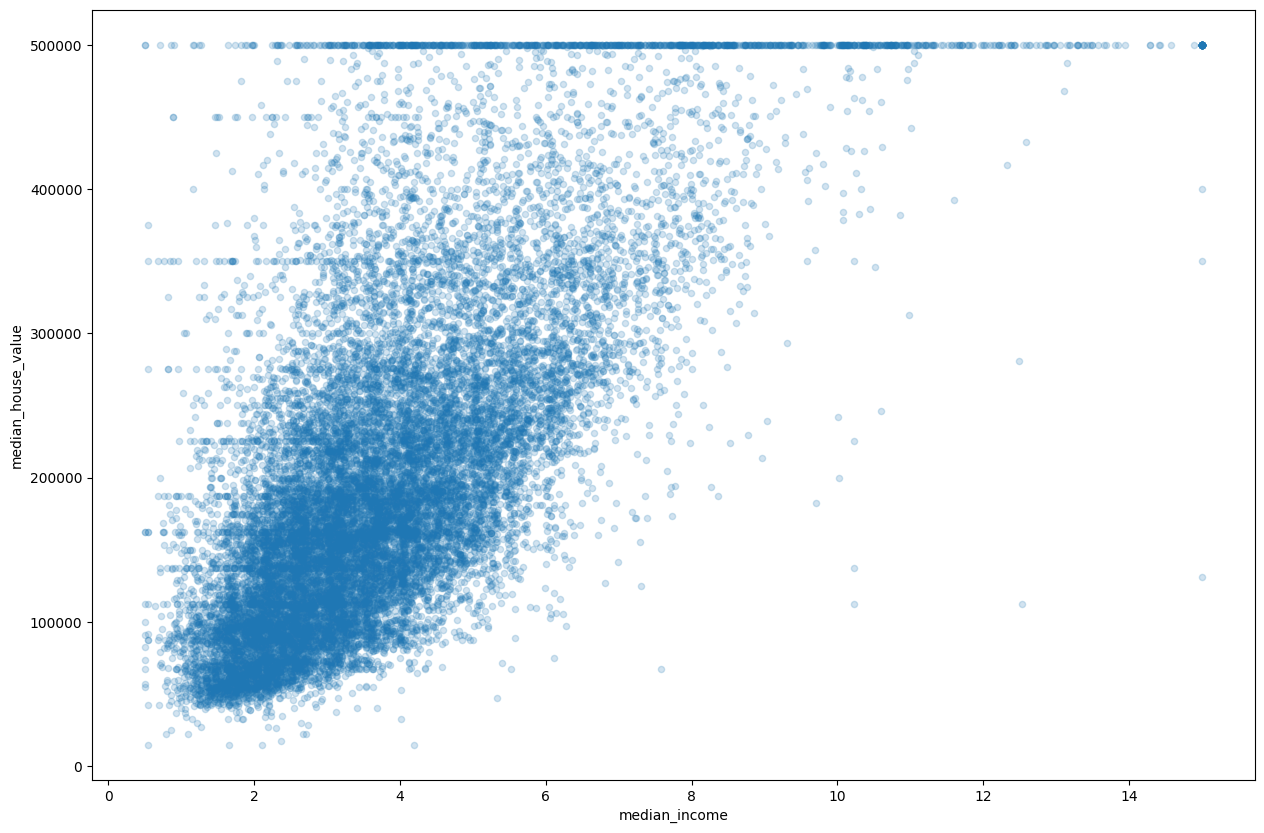

In [49]:
housing.plot(kind='scatter', x='median_income' ,y='median_house_value', alpha=0.2, figsize=(15,10))

In [50]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [51]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

C:\Users\renat\AppData\Local\Temp\ipykernel_9140\2905470689.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.688075
income_cat                  0.653983
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [55]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [57]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


imputer.fit(housing_num)

SimpleImputer()

In [58]:
imputer.statistics_

array([-1.19569704e+02,  3.56318614e+01,  2.86394864e+01,  2.63576308e+03,
        5.37870553e+02,  1.42547674e+03,  4.99539680e+02,  3.87067100e+00,
        2.06855817e+05,  3.06390504e+00,  5.42899974e+00,  2.13038830e-01,
        3.07065516e+00])

In [59]:
housing_num.median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  3.00000000e+00,  5.22912879e+00,  2.03162434e-01,
        2.81811565e+00])

In [60]:
imputer.transform(housing_num)

array([[-122.23      ,   37.88      ,   41.        , ...,    6.98412698,
           0.14659091,    2.55555556],
       [-122.22      ,   37.86      ,   21.        , ...,    6.23813708,
           0.15579659,    2.10984183],
       [-122.24      ,   37.85      ,   52.        , ...,    8.28813559,
           0.12951602,    2.80225989],
       ...,
       [-121.22      ,   39.43      ,   17.        , ...,    5.20554273,
           0.21517303,    2.3256351 ],
       [-121.32      ,   39.43      ,   18.        , ...,    5.32951289,
           0.21989247,    2.12320917],
       [-121.24      ,   39.37      ,   16.        , ...,    5.25471698,
           0.22118492,    2.61698113]])